<a href="https://colab.research.google.com/github/cxbxmxcx/GenReality/blob/master/GEN_2_conv_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
import time
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from IPython.display import clear_output

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# load the training and test datasets
train_data = datasets.CIFAR10(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.CIFAR10(root='data', train=False,
                                  download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
batch_size = 64
epochs = 100
learning_rate = 1e-3

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, 
                                          batch_size=batch_size, shuffle=True)

In [ ]:
def imshow(img):    
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image
    
# specify the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

def plot_images(images, labels, no):  
  rows = int(math.sqrt(no))
  plt.ion()
  fig = plt.figure(figsize=(rows*2, rows*2))      
  for idx in np.arange(no):
      ax = fig.add_subplot(rows, no/rows, idx+1, xticks=[], yticks=[])
      imshow(images[idx])
      ax.set_title(classes[labels[idx]]) 
  time.sleep(0.1)
  plt.pause(0.0001)     

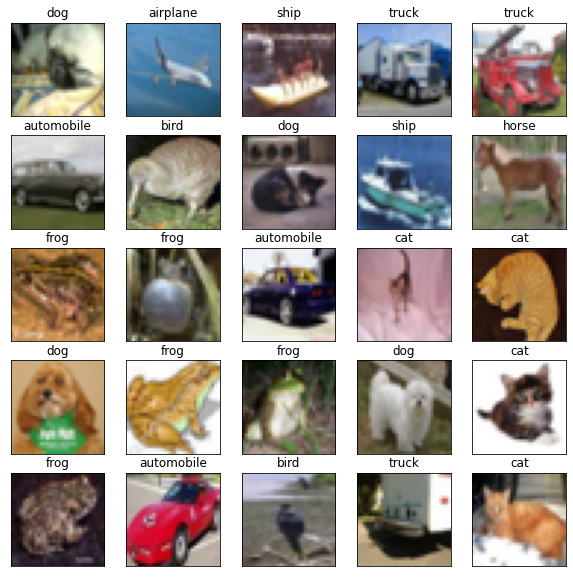

In [ ]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

plot_images(images,labels,25)

In [ ]:
class ConvAutoencoder(nn.Module):
  def __init__(self):
    super(ConvAutoencoder, self).__init__()
    self.encoder = nn.Sequential(
      nn.Conv2d(3, 16, 3, padding=1), 
      nn.ReLU(True),
      nn.MaxPool2d(2, 2),
      nn.Conv2d(16, 4, 3, padding=1), 
      nn.ReLU(True),
      nn.MaxPool2d(2, 2)
    )
    self.decoder = nn.Sequential(
      nn.ConvTranspose2d(4, 16, 2, stride=2),
      nn.ReLU(True),
      nn.ConvTranspose2d(16, 3, 2, stride=2),
      nn.Sigmoid()
    )

  def forward(self, x):        
    x = self.encoder(x)
    x = self.decoder(x)
    return x

model = ConvAutoencoder()
print(model)

ConvAutoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(4, 16, kernel_size=(2, 2), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(16, 3, kernel_size=(2, 2), stride=(2, 2))
    (3): Sigmoid()
  )
)


In [ ]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Epoch: 100 Training Loss: 0.598


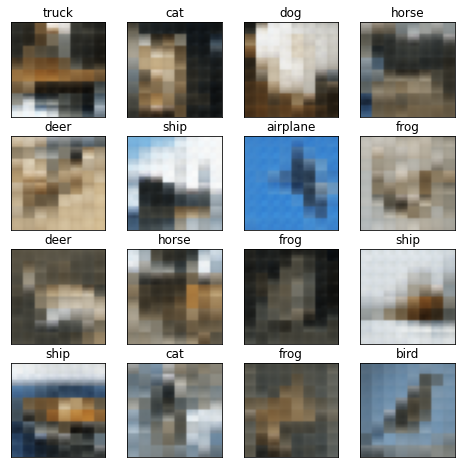

In [ ]:
for epoch in range(epochs):    
  train_loss = 0.0    
  for data in train_loader:        
    images, labels = data        
    optimizer.zero_grad()        
    generated = model(images)        
    loss = loss_fn(generated, images)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()*images.size(0)
          
  train_loss = train_loss/len(train_loader)
  clear_output()
  print(f'Epoch: {epoch+1} Training Loss: {train_loss:.3f}')    
  plot_images(generated.detach(),labels,16)   
    